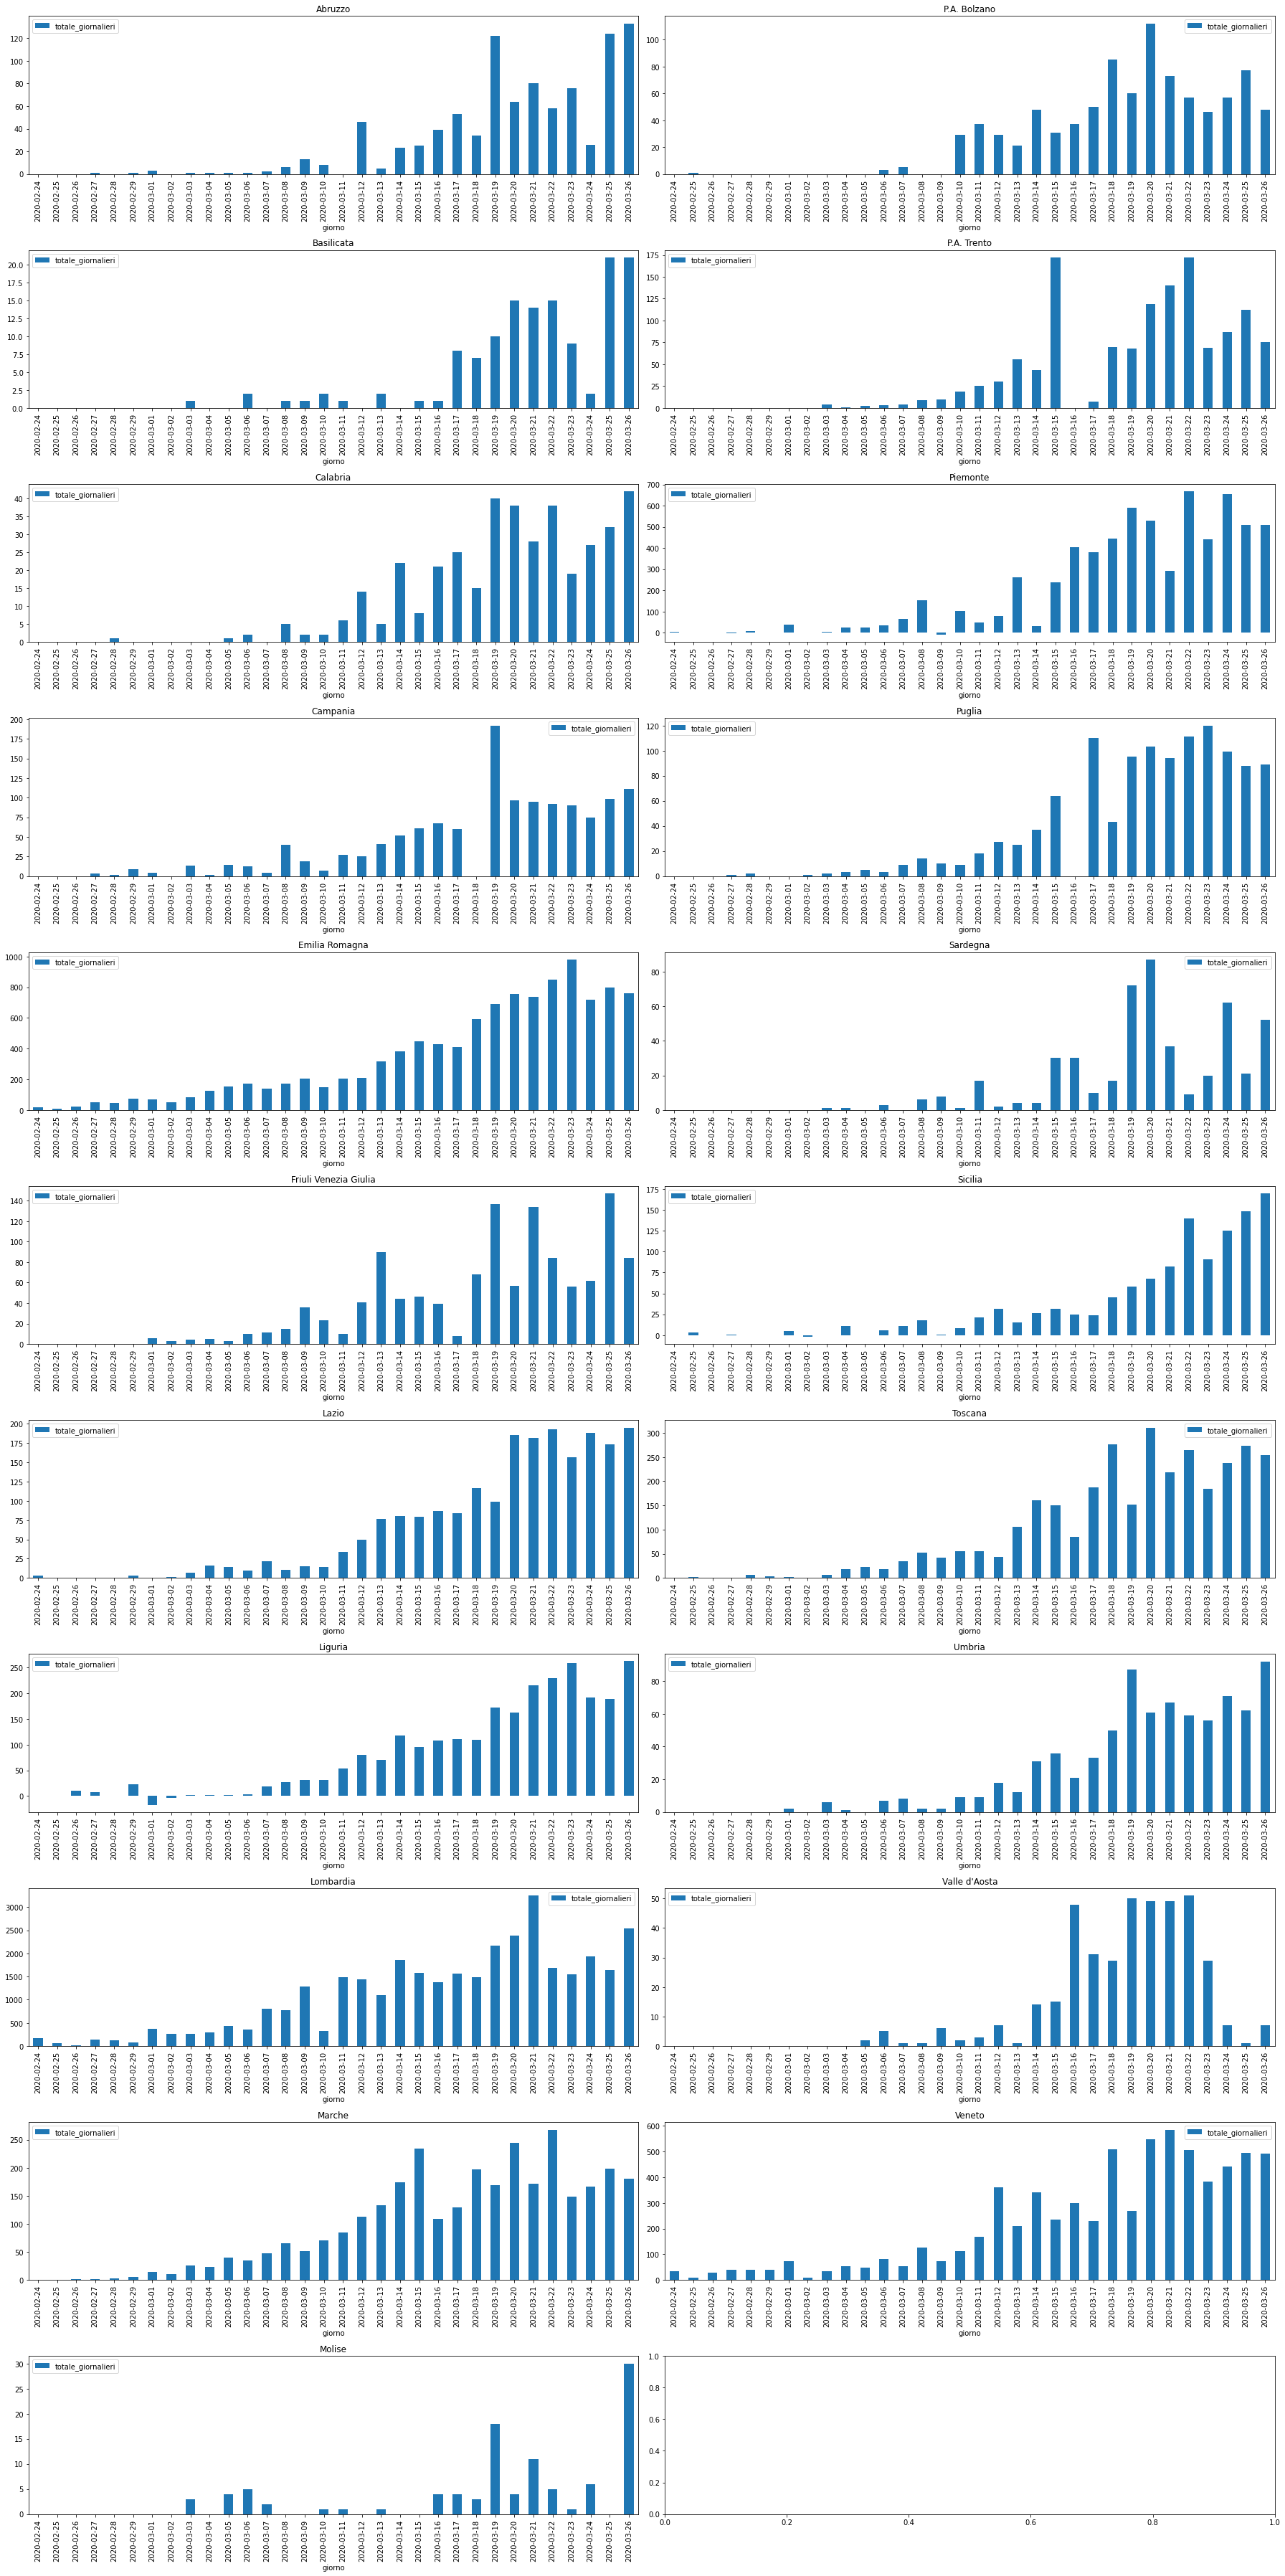

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

df = pd.read_csv("https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv")

df.insert(0, "giorno","1970-01-01", allow_duplicates=False)
df.insert(len(df.columns)-2, "totale_giornalieri", 0, allow_duplicates=False)
date_format = "%Y-%m-%dT%H:%M:%S"

def set_giorno(row):
    row["giorno"] = datetime.strptime(row['data'],date_format).date()
    return row

def add_delta(row):
     
    current_date= row['giorno']
    previous_date = (current_date - timedelta(1))
    region =  row['denominazione_regione']
    previous_record = df[(df['denominazione_regione'] == region) & (df['giorno'] == previous_date)]   
    
    if previous_record.shape[0] == 1:
        row["totale_giornalieri"] = row["totale_casi"] - previous_record["totale_casi"].values[0]
    else: row["totale_giornalieri"] = row["totale_casi"]

    return row

df = df.apply(set_giorno,axis=1)

df =df.apply(add_delta,axis=1)

grouped = df.groupby("denominazione_regione")
PLOT_ROWS= 11
PLOT_COLS = 2
figure, axes = plt.subplots(PLOT_ROWS,PLOT_COLS,figsize=(25,50))

i = 0
j = 0
for key in grouped.groups.keys():
    if i ==PLOT_ROWS:
        i = 0
        j = j+1

    grouped.get_group(key).plot.bar(title= key,x="giorno",y ='totale_giornalieri',ax=axes[i][j])
    i = i +1
figure.tight_layout()
